In [5]:
#IMPORTS
import os
import pickle
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import timedelta, datetime
import matplotlib.cm as cm
import numpy as np
import scipy
import netCDF4

In [6]:
#Code to find a correct file, given a date (and directory)

#This is the data directory I used on my computer-could be different on yours
data_dir = "merra2Dec262010/"
def find_file(date):
    date_str = date.strftime('%Y%m%d')
    if (date.year <= 2010):
        file_name = f"MERRA2_300.tavg1_2d_flx_Nx.{date_str}.SUB.nc"
    else:
        file_name = f"MERRA2_400.tavg1_2d_flx_Nx.{date_str}.SUB.nc"
    return os.path.join(data_dir, file_name)

In [7]:
#import all the days for this storm and only extract the hours the storm
#was present in
f1 = xr.open_dataset(find_file(datetime(2010,12,25)))['PRECTOTCORR']
f2 = xr.open_dataset(find_file(datetime(2010,12,26)))['PRECTOTCORR']
f3 = xr.open_dataset(find_file(datetime(2010,12,27)))['PRECTOTCORR']
f4 = xr.open_dataset(find_file(datetime(2010,12,28)))['PRECTOTCORR']
f5 = xr.open_dataset(find_file(datetime(2010,12,29)))['PRECTOTCORR']
f1 = f1[6:24]
f5 = f5[0:6]

In [8]:
#concatenate these days
f = xr.concat([f1, f2, f3, f4, f5], "time")

In [9]:
#take the sum of precipitation for the 5x5 box surrounding NYC
#and convert to mm/hr
nyc_precip = np.zeros(96)
for i in range(96):
    nyc_precip[i] = f[i, 40:45, 136:141].sum() / 25 * 3600

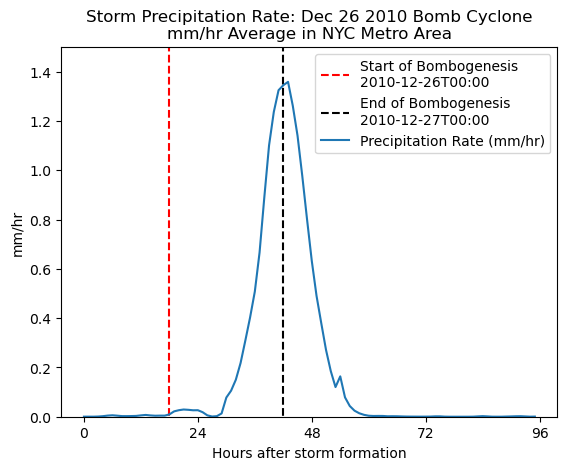

In [11]:
#plot mm/hr in the 5x5 box surrounding NYC
x1 = [18,18.001]
y1 = [-100,100]
x2 = [42,42.001]
plt.plot(x1,y1,linestyle="dashed",color="red",label="Start of Bombogenesis\n2010-12-26T00:00")
plt.plot(x2,y1,linestyle="dashed",color="black",label="End of Bombogenesis\n2010-12-27T00:00")
plt.ylim((0,1.5))
plt.xticks((0,24,48,72,96))
plt.title("Storm Precipitation Rate: Dec 26 2010 Bomb Cyclone\nmm/hr Average in NYC Metro Area")
plt.xlabel("Hours after storm formation")
plt.ylabel("mm/hr")
plt.plot(nyc_precip, label="Precipitation Rate (mm/hr)")
plt.legend()
plt.savefig("figures/Dec26PrecipRateNYC.png")